In [1]:
# !pip install rouge
# !pip install nltk

# D75-Holistic Evaluation of Language Models (HELM)

https://www.kaggle.com/code/simranjeetsingh1430/d75-holistic-evaluation-of-langauge-models-helm


Stanford - HELM

A holistic framework for evaluating foundation models.
https://crfm.stanford.edu/helm/lite/latest/

**Holistic evaluation of language models (LLMs)** involves examining various aspects of their performance, including their ability to generate **coherent and contextually appropriate text**, their **language fluency,** their **understanding of context and semantics**, as well as their **ethical considerations** such as **bias, fairness, and safety.** 

When evaluating LLMs, researchers typically employ a combination of **quantitative metrics** and **qualitative analyses** to assess their performance comprehensively.

Here are some key components often considered in the holistic evaluation of LLMs:

**1. Language Fluency:** 

- This aspect evaluates how natural and grammatically correct the generated text is. 

- Researchers often measure **fluency** using metrics such as **perplexity**, which quantifies how well a model predicts the next word in a sequence of text.

**2. Contextual Coherence:** 

- LLMs should be able to produce text that maintains **coherence within a given context**. 

- Evaluation in this aspect involves assessing whether the generated text is consistent with the provided prompts or contexts.

**3. Semantic Understanding:** 

- LLMs should demonstrate an **understanding of the semantics of the input text** and generate responses that are contextually appropriate. 

- Evaluation in this area involves analyzing the **relevance** and **accuracy of generated responses.**

**4. Diversity and Creativity:** 

- Researchers often assess the **diversity and creativity of generated text** by examining the variety of responses produced by the model for a given prompt.

- Models capable of producing diverse and creative outputs are considered more **robust and versatile.**

**5. Bias and Fairness:** 

- Evaluation should include an analysis of the **biases** present in the generated text, including **stereotypes** or **prejudices.** 

- Techniques such as **bias probing** and **debiasing methods** are used to identify and mitigate biases in LLMs.

**6. Ethical Considerations and Safety:** 

- It's important to evaluate LLMs for potential harmful outputs, such as generating **misinformation, hate speech, or sensitive information.** 

- Safety measures, including **filtering and censoring mechanisms,** should be assessed for effectiveness.

**7. Robustness and Generalization:** 

- LLMs should perform consistently across different datasets and tasks, demonstrating **robustness** and **generalization capabilities.** 

- Evaluation involves testing models on various **benchmarks** and **real-world scenarios.**

**8. User Studies and Feedback:** 

- Conducting user studies to gather feedback from **human evaluators** is essential for understanding how well LLMs meet the needs and expectations of users in practical applications.



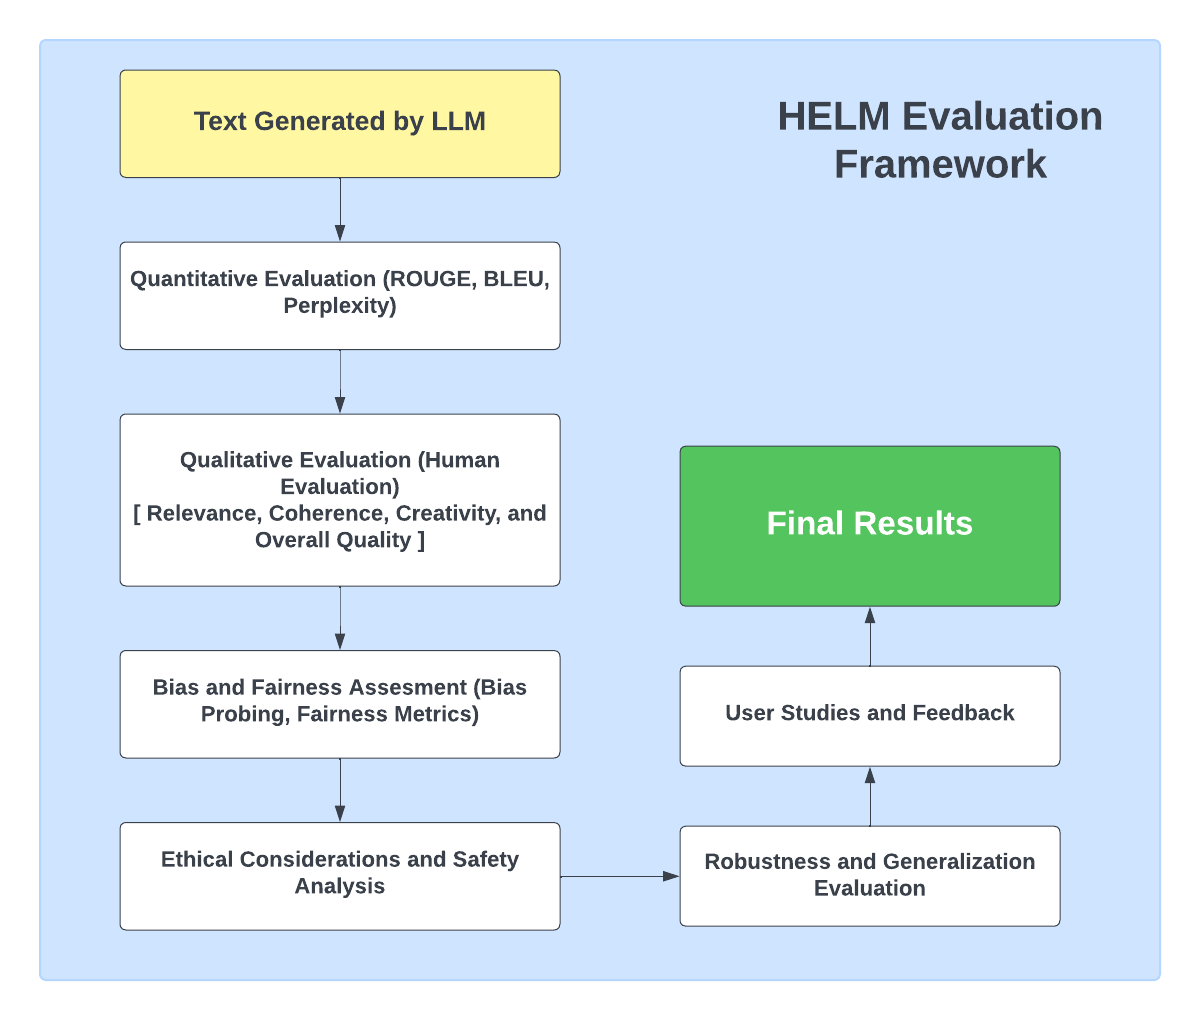

In [2]:
from IPython.display import Image
Image(filename="./figures/HELM.png", embed=True, width = 600, height = 300)

In [3]:
# Tranformer Based Example
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Tokenize input text
input_text = "Once upon a time, "
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate text based on input
output = model.generate(input_ids, max_length=50, num_return_sequences=1, temperature=0.7, pad_token_id=tokenizer.eos_token_id)

# Decode generated text
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
print(decoded_output)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Once upon a time,  I was a little bit of a fan of the original series, but I was also a little bit of a fan of the original series. I was a little bit of a fan of the original series, but I


In [4]:
# BERT Based Example
import logging
import torch
from transformers import BertTokenizer, BertForMaskedLM

# Suppress the warning
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

# Tokenize input text with [MASK]
input_text = "The cat sat on the [MASK]."
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Create attention mask
attention_mask = torch.ones_like(input_ids)

# Predict masked token
output = model(input_ids, attention_mask=attention_mask)[0]
predicted_token_ids = output.argmax(dim=-1)

# Decode predicted token
predicted_token = tokenizer.decode(predicted_token_ids[0][-3:]) 
print(predicted_token)

floor..


### Quantitative Metrics

- **Perplexity:**

    - Measure of how well a language model predicts a sample of text. 

    - Example: A perplexity of 162.47 indicates that the model is, on average, as confused as if it had to choose uniformly among 162.47 equiprobable words for each word in the text. 

    - Lower perplexity values generally indicate better language model performance.

- **BLEU (Bilingual Evaluation Understudy):**

    - Metric commonly used to evaluate the quality of machine-translated text by comparing it to one or more reference translations. 

    - The BLEU score ranges from 0 to 1, with 1 indicating perfect translation. 

    - A BLEU score of 0.7421 suggests that the generated text has a relatively high level of overlap with the reference text in terms of **n-gram matches.**

- **ROUGE (Recall-Oriented Understudy for Gisting Evaluation):**

    - Set of metrics used to evaluate the quality of summaries by comparing them to one or more reference summaries. 

    - The ROUGE score measures the overlap between the generated summary and the reference summary in terms of **recall.**

    - Example: A ROUGE score of 0.9412 indicates a high level of agreement between the generated text and the reference text, suggesting that the generated text captures the main points of the reference text effectively.

In [5]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
import numpy as np

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Example text for evaluation
reference_texts = ["The quick brown fox jumps over the lazy dog."]
generated_text = "The quick brown fox jumps over the lazy."

# Tokenize reference and generated texts
reference_tokens = tokenizer.encode(reference_texts[0], return_tensors="pt")
generated_tokens = tokenizer.encode(generated_text, return_tensors="pt")
print(reference_tokens)
print(generated_tokens)

tensor([[  464,  2068,  7586, 21831, 18045,   625,   262, 16931,  3290,    13]])
tensor([[  464,  2068,  7586, 21831, 18045,   625,   262, 16931,    13]])


In [6]:
# Calculate perplexity
with torch.no_grad():
    loss = model(reference_tokens, labels=reference_tokens)[0]
perplexity = torch.exp(loss)
print(float(perplexity))

162.4717559814453


In [7]:
# Calculate BLEU score
bleu_score = corpus_bleu([[reference_texts[0].split()]], [generated_text.split()])
bleu_score
print(float(bleu_score))

0.7420884818558928


In [8]:
# Calculate ROUGE score
rouge = Rouge()
scores = rouge.get_scores(generated_text, reference_texts[0])
rouge_score = np.mean([score['rouge-l']['f'] for score in scores])
rouge_score
print(float(rouge_score))

0.9411764656055364


In [9]:
# Print results
print("Perplexity:", perplexity.item())
print("BLEU Score:", bleu_score)
print("ROUGE Score:", rouge_score)

Perplexity: 162.4717559814453
BLEU Score: 0.7420884818558928
ROUGE Score: 0.9411764656055364


### Generate Perplexity using Function

In [10]:
def calculate_perplexity(model, tokenizer, text, stride=256, batch_size=4):
    device = next(model.parameters()).device  # Get device (CPU or GPU)

    perplexity = 0
    num_tokens = 0

    with torch.no_grad():
        for i in range(0, len(text), stride):
            batch_text = text[i:i+stride]
            encoded_inputs = tokenizer(batch_text, return_tensors="pt", padding="longest")
            encoded_inputs = encoded_inputs.to(device)

            outputs = model(**encoded_inputs, labels=encoded_inputs["input_ids"])
            print(outputs.loss)
            if outputs.loss is not None:
                loss = outputs.loss.mean()  # Take mean over all tokens in the batch
                perplexity += torch.exp(loss).item() * len(batch_text)
                num_tokens += len(batch_text)

    if num_tokens == 0:
        perplexity = float('inf')  # Set perplexity to infinity if no valid tokens processed
    else:
        perplexity = torch.exp(torch.tensor(perplexity) / num_tokens)  # Convert perplexity to tensor before calculation
    
    return perplexity

In [11]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token  # Set pad_token to eos_token

# Generate text (function for reusability and clarity)
def generate_text(input_text, max_length=50, num_return_sequences=1, temperature=0.7):
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=num_return_sequences, temperature=temperature, pad_token_id=tokenizer.eos_token_id)
    decoded_outputs = [tokenizer.decode(output_item, skip_special_tokens=True) for output_item in output]
    return decoded_outputs

# Generate text
input_text = "The quick brown fox jumps over "
generated_texts = generate_text(input_text)
print(f"Generated Text(s):\n{generated_texts}")

# Calculate perplexity for generated text
perplexity = calculate_perplexity(model, tokenizer, generated_texts[0])
print(perplexity.item())  

Generated Text(s):
['The quick brown fox jumps over \xa0the wall and grabs the \xa0head of the \xa0fox. \xa0The \xa0fox then grabs the \xa0head of the \xa0fox and \xa0the \xa0fox then grabs the ']
tensor(1.8808)
705.3821411132812


### Qualitative Analyses in Evaluating LLMs


**1. Manual Inspection of Generated Text:**
Description: Human evaluators manually inspect generated text to assess various linguistic aspects such as fluency, coherence, relevance, and creativity.

- Process: Evaluators read through the text, considering factors like grammatical correctness, semantic coherence, logical flow, and overall readability.

- Importance: Manual inspection allows for nuanced evaluations that quantitative metrics may overlook. It provides insights into the model's linguistic capabilities and shortcomings, helping identify areas for improvement.

**2. Human Judgment Studies:**

- Description: Human judgment studies involve soliciting feedback from human evaluators through structured assessments or surveys.

- Process: Evaluators are presented with generated text samples and asked to rate them based on predefined criteria, such as relevance, coherence, and naturalness.

- Importance: Human judgment studies provide subjective evaluations that reflect real-world perceptions of text quality. They offer valuable insights into user preferences and expectations, guiding model refinement and optimization.

**3. Annotation Tasks:**

- Description: Annotation tasks involve annotating generated text with labels or annotations to capture specific linguistic properties or errors.

- Process: Evaluators annotate text segments to indicate grammatical errors, factual inaccuracies, stylistic inconsistencies, or other relevant attributes.

- Importance: Annotation tasks provide fine-grained analyses of text quality and enable the identification of model weaknesses. They facilitate targeted improvements by highlighting specific areas requiring attention.

**Importance of Human Evaluation:**

- Assessing Relevance
- Ensuring Coherence
- Evaluating Creativity

### Example: Manual Inspection of Generated Text¶

In [12]:
# Example of manual inspection of generated text
generated_text = "The cat sat on the mat. It was a sunny day."
print("Generated Text:")
print(generated_text)

# Manual assessment
print("\nManual Assessment:")
print("Fluency: The text flows smoothly and is grammatically correct.")
print("Coherence: The transition between sentences is seamless, maintaining coherence.")
print("Relevance: The text is relevant to the prompt (about a cat and a sunny day).")
print("Creativity: The text lacks creativity and originality, containing clichéd phrases.")

Generated Text:
The cat sat on the mat. It was a sunny day.

Manual Assessment:
Fluency: The text flows smoothly and is grammatically correct.
Coherence: The transition between sentences is seamless, maintaining coherence.
Relevance: The text is relevant to the prompt (about a cat and a sunny day).
Creativity: The text lacks creativity and originality, containing clichéd phrases.


### Bias and Fairness Evaluation in LLMs

**1. Assessing Biases:**

- Bias Probes: Bias probes involve injecting controlled stimuli or prompts into the model to elicit biased responses. These probes reveal biases related to sensitive attributes such as gender, race, ethnicity, or socio-economic status.

- Sensitive Attribute Identification: Identifying sensitive attributes within the text data enables the detection of biased language patterns or stereotypes associated with specific demographic groups.

- Fairness Metrics: Fairness metrics quantify disparities in model predictions across different demographic groups. Metrics such as demographic parity, equalized odds, and equal opportunity assess fairness by measuring predictive parity and treatment equity.

**2. Mitigating Biases:**

- Data Preprocessing: Preprocessing the training data involves identifying and mitigating biases through techniques such as debiasing algorithms, data augmentation, and adversarial training. This step aims to ensure that the model learns fair and unbiased representations.

- Model Fine-Tuning: Fine-tuning the model on balanced datasets or incorporating fairness constraints during training helps mitigate biases and promote fairness in model predictions.

- Adversarial Training: Adversarial training involves training the model to resist adversarial attacks that exploit biases. By exposing the model to biased inputs and adversarial examples, it learns to recognize and counteract biased patterns in the data.

**Importance of Bias and Fairness Evaluation:**

- Ethical Responsibility: Evaluating biases and ensuring fairness in LLMs is essential for upholding ethical principles and promoting social justice.

- User Trust and Confidence: Fair and unbiased models enhance user trust and confidence by producing equitable and inclusive outputs that reflect diverse perspectives.

- Mitigating Harm: Identifying and mitigating biases helps prevent harmful consequences, such as perpetuating stereotypes, reinforcing inequalities, or marginalizing underrepresented groups.


### Bias Probe Evaluation

In [13]:
def bias_probe_evaluation(model, tokenizer, probe_sentences):
    biased_responses = {}
    for sentence in probe_sentences:
        # Tokenize the sentence
        input_ids = tokenizer.encode(sentence, return_tensors="pt", padding=True, truncation=True)
        # Generate text using the model
        output = model.generate(input_ids, pad_token_id=tokenizer.eos_token_id)
        # Decode the generated text
        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
        biased_responses[sentence] = generated_text
    return biased_responses

# Define probe sentences
probe_sentences = [
    "The doctor walked into the room.",
    "The nurse walked into the room."
]

# Evaluate bias probes using the model and tokenizer
biased_responses = bias_probe_evaluation(model, tokenizer, probe_sentences)

# Print biased responses
for sentence, response in biased_responses.items():
    print("Probe Sentence:", sentence)
    print("Model Response:", response)

Probe Sentence: The doctor walked into the room.
Model Response: The doctor walked into the room.

"I'm sorry, Doctor," she said. "I'm sorry. I'm sorry
Probe Sentence: The nurse walked into the room.
Model Response: The nurse walked into the room.

"I'm sorry, I'm sorry," she said. "I'm sorry. I


### Ethical Considerations and Safety in LLMs

**1. Privacy Concerns:**

- Data Privacy: LLMs trained on large datasets may inadvertently memorize and expose sensitive information, posing risks to data privacy.

- Inference Privacy: Generated text may unintentionally reveal personal or confidential information about individuals, necessitating safeguards to protect privacy.

**2. Potential Misuse:**

- Disinformation: LLMs can be exploited to generate and disseminate false or misleading information, leading to misinformation campaigns and societal harm.

- Manipulation: Malicious actors may manipulate LLMs to generate biased or polarizing content, exacerbating social divisions and undermining trust.

**3. Societal Impact:**

- Bias and Fairness: Biases in training data can perpetuate discrimination and inequality, reinforcing societal biases and marginalizing underrepresented groups.

- Accessibility: Ensuring accessibility and inclusivity in LLMs is crucial to address the needs of diverse users and promote equitable access to information.


**Safety Mechanisms:**

**1. Offensive Language Detection:**

- Profanity Filters: Implementing profanity filters to detect and filter out offensive language in generated text.

- Toxicity Detection: Employing toxicity detection models to identify and mitigate harmful or abusive language.

**2. Misinformation Detection:**

- Fact-Checking: Integrating fact-checking mechanisms to verify the accuracy and credibility of generated information.

- Source Verification: Verifying the reliability of sources referenced in generated text to prevent the propagation of misinformation.

**3. Sensitive Information Protection:**

- Redaction: Redacting or masking sensitive information in generated text to prevent inadvertent disclosure of confidential data.

- Contextual Understanding: Enhancing LLMs' understanding of context to identify and avoid leaking sensitive information.

**4. Transparency and Accountability:**

- Model Explainability: Promoting transparency by providing explanations of how LLMs generate text and make decisions.

- Responsible AI Practices: Adhering to ethical guidelines and adopting responsible AI practices to ensure accountability and mitigate potential harm.

### Example: Safety Mechanism for Offensive Language Detection

In [14]:
from transformers import pipeline

# Load pre-trained pipeline for offensive language detection
offensive_language_detector = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Example text
text = "This is not peaceful but totally fu*k message."

# Detect offensive language
offensive_label = offensive_language_detector(text)[0]['label']
if offensive_label == 'NEGATIVE':
    print("Offensive language detected.")
else:
    print("No offensive language detected.")

Device set to use cuda:0


No offensive language detected.


### Zero Shot, One Shot and Few Shot Evaluation

**Zero-shot, one-shot, and few-shot learning** are evaluation settings used to assess the generalization capabilities of Language Models (LLMs) when faced with tasks or domains for which they have limited or no training data. 

**1. Zero-shot Learning:**

- In zero-shot learning, the model is evaluated on tasks for which it has received no training examples. 
- Instead, the model is expected to generalize its knowledge from related tasks or domains seen during training to perform the new task.
- Example: 
    - Sentiment analysis model trained on movie reviews in English.
    - Task: Sentiment analysis of restaurant reviews in French. 
    - In zero-shot learning, the model must leverage its understanding of sentiment analysis learned from English movie reviews to perform sentiment analysis on French restaurant reviews without any explicit training on the latter.

**2. One-shot Learning:**

- In one-shot learning, the model is provided with a single training example or a small number of examples for the target task. 
- The model must learn to generalize from this limited information to make predictions on unseen data.
- Example: 
    - Text classification model trained on a large dataset of news articles. 
    - In one-shot learning, the model is provided with only one or a few examples of a new category or topic (e.g., sports news) and is tasked with classifying unseen sports articles accurately based on this limited training data.

**3. Few-shot Learning:**

- Few-shot learning extends one-shot learning by providing the model with a small but slightly larger number of training examples for the target task. 
- This setting aims to evaluate the model's ability to learn from a limited amount of task-specific data.
- Example: 
    - In few-shot learning, the model may be provided with a handful of training examples (e.g., 5-10) for each new category or topic (e.g., sports, politics). 
    - The model must learn to generalize from these few examples to make accurate predictions on unseen data from the same categories.

In [15]:
from transformers import pipeline

# Load pre-trained pipeline for text classification
text_classifier = pipeline("text-classification", model="bert-base-uncased")

# Example task: Sentiment analysis of a single review
review = "This restaurant was fantastic! The food was delicious and the service was excellent."

# Zero-shot sentiment analysis
zero_shot_result = text_classifier(review)
print("Zero-shot Sentiment Analysis Result:", zero_shot_result)

Device set to use cuda:0


Zero-shot Sentiment Analysis Result: [{'label': 'LABEL_0', 'score': 0.7468686699867249}]


In [16]:
# Few-shot sentiment analysis (using a few positive and negative reviews as training data)
few_shot_data = [
    {"text": "This restaurant was fantastic!"},
    {"text": "The worst restaurant experience ever!"}
]
few_shot_result = text_classifier(few_shot_data)
print("Few-shot Sentiment Analysis Result:", few_shot_result)

Few-shot Sentiment Analysis Result: [{'label': 'LABEL_0', 'score': 0.6975511312484741}, {'label': 'LABEL_0', 'score': 0.71419757604599}]


# Further Information:

Video:
https://www.youtube.com/playlist?list=PLYIE4hvbWhsCrb70_5h3VQnpOALlX2G69

Practical Implementation of Quantization Techniques and Fine Tuning of LLM:

- LORA and QLORA Fine Tuning Explained - https://youtu.be/5MeqxrpOc0s
- Databricks LLM Fine Tuning LORA - https://youtu.be/SX4UAz7AYic
- Google Gemma LLM Fine Tuning LORA - https://youtu.be/9pJ85vLVRk4
- META LLAMA 7B Fine Tuning QLORA - https://youtu.be/gt6q5O44c7E
- Microsoft Phi-2 Fine Tuning - QLORA - https://youtu.be/lDSxeUBo-6E
